<a href="https://colab.research.google.com/github/joeenn/Kapita-Selekta-Matematika-Terapan/blob/main/Text%20Processing%20with%20NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started With Python’s NLTK

Install library NLTK

In [ ]:
!pip install nltk==3.5

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434694 sha256=748c298e106c582c183550de3d106e63ccbb4e7de906394c5532ba8b9de49f9c
  Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


Import NLTK

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Case Folding

Case Folding adalah tahap untuk konversi text menjadi suatu bentuk yang standar. Pada tahap ini biasanya dipilih lowercase untuk membuat huruf kapital menjadi lowercase

In [ ]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn 4 books.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult. Using email joke@123.com ! and #tweet #paste"""

In [ ]:
Lower_string = example_string.lower()

print(Lower_string)


muad'dib learned rapidly because his first training was in how to learn 4 books.
and the first lesson of all was the basic trust that he could learn.
it's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult. using email joke@123.com ! and #tweet #paste


## Tokenizing

Pada tahap ini, text yang telah melewati tahap Case Folding akan dilakukan proses pemecahan perkata menggunakan fungsi .word_tokenize() pada library NLTK. Selain itu pada tahap inijuga akan dilakukan proses removing number, whitespace dan puctuation (tanda baca).

* Removing number, akan menggunakan fungsi re.sub(pattern, replace_string, string) untuk replace angka dengan “” ada library re (regex) menggunakan pattern \d+ . Dimana \d untuk matching digit (0–9) dan + sebagai quantifier untuk menemukan 1 atau lebih matching \d . Sehingga penggunaanya akan seperti berikut, re.sub(r"\d+", "", "H3llo") yang akan menghasilkan Hllo.

* Removing punctuation, akan menggunakan fungsi .translate() yang akan memetakan teks kedalam character yang sesuai pada mapping table .maketrans() . untuk mengganti sting.punctuation berupa (!”#$%&\’()*+,-./:;<=>?@[ \ \ ]^_` { | } ~ ) dengan "" .

* Removing whitespace, akan menggunakan fungsi .strip() untuk menghapus whitespace leading dan trailing, dan menggunakan fungsi regex substraction re.sub(pattern, replace_string, string) dengan pattern \s+ untuk matching whitespace dengan quantifier matching 1 atau lebih whitespace.

In [ ]:
import string 
import re #regex library
from nltk.tokenize import word_tokenize 


In [ ]:
#remove angka
Lower_string = re.sub(r"\d+", "", Lower_string)


In [ ]:
#remove punctuation
Lower_string = Lower_string.translate(str.maketrans("","",string.punctuation))


In [ ]:
#remove whitespace leading & trailing
Lower_string = Lower_string.strip()


In [ ]:
#remove multiple whitespace into single whitespace
Lower_string = re.sub('\s+',' ',Lower_string)


In [ ]:
tokens = nltk.tokenize.word_tokenize(Lower_string)

print('Tokenizing Result : \n') 
print(tokens)

Tokenizing Result : 

['muaddib', 'learned', 'rapidly', 'because', 'his', 'first', 'training', 'was', 'in', 'how', 'to', 'learn', 'books', 'and', 'the', 'first', 'lesson', 'of', 'all', 'was', 'the', 'basic', 'trust', 'that', 'he', 'could', 'learn', 'its', 'shocking', 'to', 'find', 'how', 'many', 'people', 'do', 'not', 'believe', 'they', 'can', 'learn', 'and', 'how', 'many', 'more', 'believe', 'learning', 'to', 'be', 'difficult', 'using', 'email', 'jokecom', 'and', 'tweet', 'paste']


Frekuensi kata

In [ ]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [ ]:
freq_tokens = nltk.FreqDist(tokens)

print('Frequency Tokens : \n') 
print(freq_tokens.most_common())

Frequency Tokens : 

[('how', 3), ('to', 3), ('learn', 3), ('and', 3), ('first', 2), ('was', 2), ('the', 2), ('many', 2), ('believe', 2), ('muaddib', 1), ('learned', 1), ('rapidly', 1), ('because', 1), ('his', 1), ('training', 1), ('in', 1), ('books', 1), ('lesson', 1), ('of', 1), ('all', 1), ('basic', 1), ('trust', 1), ('that', 1), ('he', 1), ('could', 1), ('its', 1), ('shocking', 1), ('find', 1), ('people', 1), ('do', 1), ('not', 1), ('they', 1), ('can', 1), ('more', 1), ('learning', 1), ('be', 1), ('difficult', 1), ('using', 1), ('email', 1), ('jokecom', 1), ('tweet', 1), ('paste', 1)]


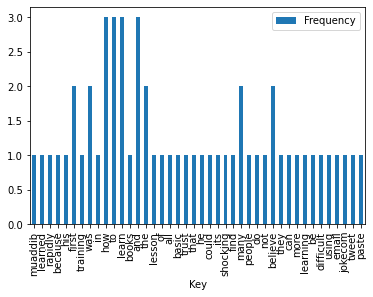

In [ ]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

## Filtering

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

list_stopwords = set(stopwords.words('english'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]


print(tokens_without_stopword)

['learn', 'first', 'many', 'believe', 'muaddib', 'learned', 'rapidly', 'training', 'books', 'lesson', 'basic', 'trust', 'could', 'shocking', 'find', 'people', 'learning', 'difficult', 'using', 'email', 'jokecom', 'tweet', 'paste']


## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer = PorterStemmer()

In [ ]:
# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['learn : learn',
 'first : first',
 'many : mani',
 'believe : believ',
 'muaddib : muaddib',
 'learned : learn',
 'rapidly : rapidli',
 'training : train',
 'books : book',
 'lesson : lesson',
 'basic : basic',
 'trust : trust',
 'could : could',
 'shocking : shock',
 'find : find',
 'people : peopl',
 'learning : learn',
 'difficult : difficult',
 'using : use',
 'email : email',
 'jokecom : jokecom',
 'tweet : tweet',
 'paste : past']

# Homework

Carilah sentence dinternet mengenai topik Covid-19 dan vaksin, dan lakukan text processing seperti pada contoh2 di atas. 